In [1]:
import pandas as pd
import numpy as np
import props as p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_15 = pd.read_csv('../../clean_data/player_weekly_performance_2015.csv')
df_16 = pd.read_csv('../../clean_data/player_weekly_performance_2016.csv')
df_17 = pd.read_csv('../../clean_data/player_weekly_performance_2017.csv')
df_18 = pd.read_csv('../../clean_data/player_weekly_performance_2018.csv')

In [3]:
df_15.name = '2015 Weekly Data'
df_16.name = '2016 Weekly Data'
df_17.name = '2017 Weekly Data'
df_18.name = '2018 Weekly Data'

In [4]:
df_list = [df_15, df_16, df_17, df_18]
p.print_props(df_list, '.head()')

	First 5 rows of DataFrame: 2015 Weekly Data
----------------------------------------
   Rank  PlayerID            Name Team Position  Week Opponent  PassingYards  \
0     1     16668     Carlos Hyde   SF       RB     1      MIN             0   
1     2      4314       Tom Brady   NE       QB     1      PIT           288   
2     3     10974  Rob Gronkowski   NE       TE     1      PIT             0   
3     4     13291     Julio Jones  ATL       WR     1      PHI             0   
4     5      2428   Carson Palmer  ARI       QB     1       NO           307   

   PassingTouchdowns  PassingInterceptions  RushingYards  RushingTouchdowns  \
0                  0                     0           168                  2   
1                  4                     0             1                  0   
2                  0                     0             0                  0   
3                  0                     0             0                  0   
4                  3                  

In [5]:
p.print_props(df_list, '.dtypes')

	Data Types of DataFrame: 2015 Weekly Data
----------------------------------------
Rank                      int64
PlayerID                  int64
Name                     object
Team                     object
Position                 object
Week                      int64
Opponent                 object
PassingYards              int64
PassingTouchdowns         int64
PassingInterceptions      int64
RushingYards              int64
RushingTouchdowns         int64
Receptions                int64
ReceivingYards            int64
ReceivingTouchdowns       int64
FumblesLost               int64
FantasyPointsPerGame    float64
FantasyPoints           float64
Date                     object
dtype: object

	Data Types of DataFrame: 2016 Weekly Data
----------------------------------------
Rank                      int64
PlayerID                  int64
Name                     object
Team                     object
Position                 object
Week                      int64
Opponent         

In [6]:
# Combine all data per week into one dataframe.
df = pd.concat(df_list, ignore_index = True)
df.head()

,Rank,PlayerID,Name,Team,Position,Week,Opponent,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,FumblesLost,FantasyPointsPerGame,FantasyPoints,Date
0,1,16668,Carlos Hyde,SF,RB,1,MIN,0,0,0,168,2,2,14,0,0,30.2,30.20,2015-09-13
1,2,4314,Tom Brady,NE,QB,1,PIT,288,4,0,1,0,0,0,0,0,27.6,27.62,2015-09-13
2,3,10974,Rob Gronkowski,NE,TE,1,PIT,0,0,0,0,0,5,94,3,0,27.4,27.40,2015-09-13
3,4,13291,Julio Jones,ATL,WR,1,PHI,0,0,0,0,0,9,141,2,0,26.1,26.10,2015-09-13
4,5,2428,Carson Palmer,ARI,QB,1,NO,307,3,0,14,0,0,0,0,0,25.7,25.68,2015-09-13


In [7]:
df.shape

(20400, 19)

In [8]:
df.isnull().sum()

Rank                    0
PlayerID                0
Name                    0
Team                    0
Position                0
Week                    0
Opponent                0
PassingYards            0
PassingTouchdowns       0
PassingInterceptions    0
RushingYards            0
RushingTouchdowns       0
Receptions              0
ReceivingYards          0
ReceivingTouchdowns     0
FumblesLost             0
FantasyPointsPerGame    0
FantasyPoints           0
Date                    0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.dtypes

Rank                             int64
PlayerID                         int64
Name                            object
Team                            object
Position                        object
Week                             int64
Opponent                        object
PassingYards                     int64
PassingTouchdowns                int64
PassingInterceptions             int64
RushingYards                     int64
RushingTouchdowns                int64
Receptions                       int64
ReceivingYards                   int64
ReceivingTouchdowns              int64
FumblesLost                      int64
FantasyPointsPerGame           float64
FantasyPoints                  float64
Date                    datetime64[ns]
dtype: object

In [10]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Rank,PlayerID,Name,Team,Position,Week,Opponent,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,FumblesLost,FantasyPointsPerGame,FantasyPoints
Date,,,,,,,,,,,,,,,,,,
2015-09-13,1,16668,Carlos Hyde,SF,RB,1,MIN,0,0,0,168,2,2,14,0,0,30.2,30.20
2015-09-13,2,4314,Tom Brady,NE,QB,1,PIT,288,4,0,1,0,0,0,0,0,27.6,27.62
2015-09-13,3,10974,Rob Gronkowski,NE,TE,1,PIT,0,0,0,0,0,5,94,3,0,27.4,27.40
2015-09-13,4,13291,Julio Jones,ATL,WR,1,PHI,0,0,0,0,0,9,141,2,0,26.1,26.10
2015-09-13,5,2428,Carson Palmer,ARI,QB,1,NO,307,3,0,14,0,0,0,0,0,25.7,25.68


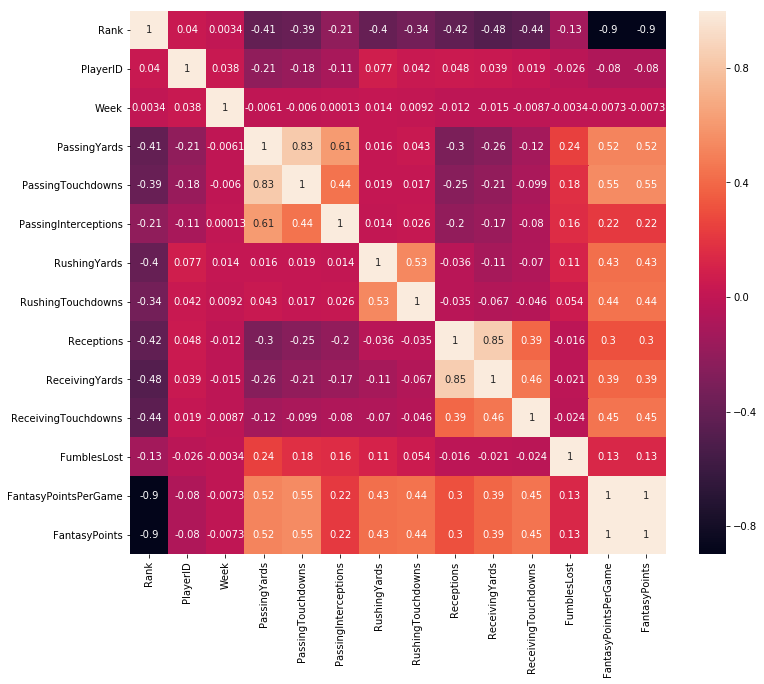

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True)
plt.savefig('../../images/player_performance_overall_heatmap.png');

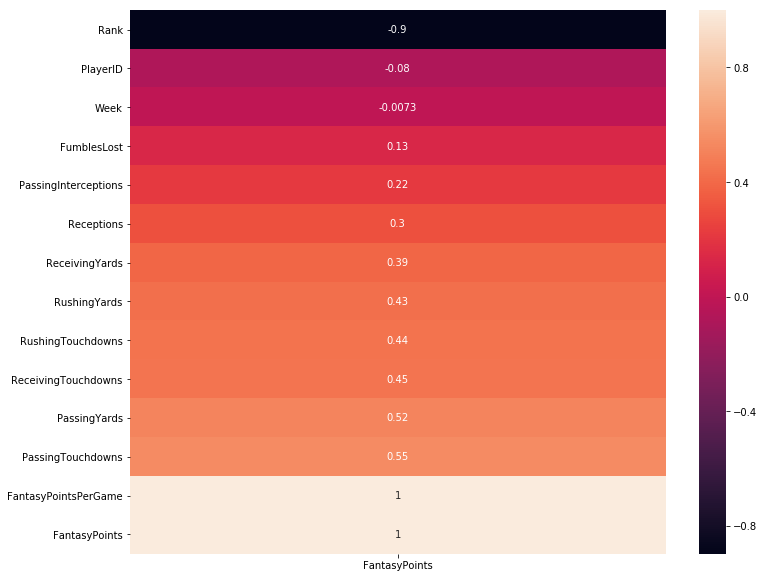

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr()[['FantasyPoints']].sort_values('FantasyPoints'), annot = True)
plt.savefig('../../images/fantasy_points_per_week_correlation_heatmap.png');

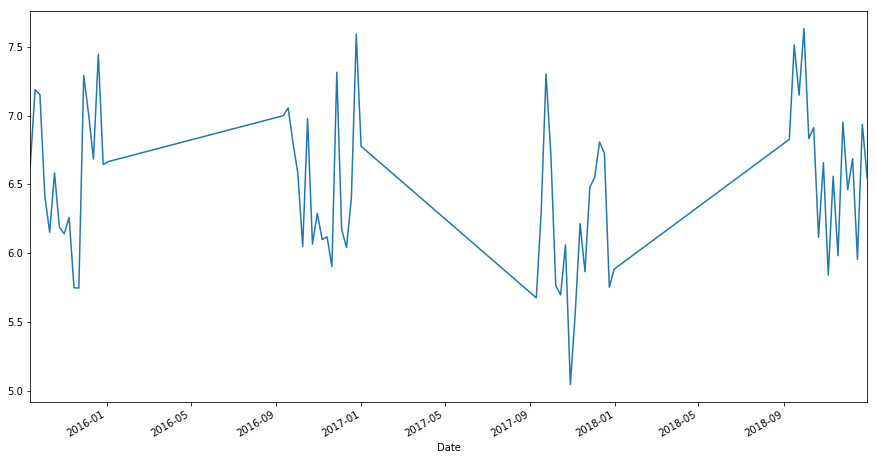

In [13]:
plt.figure(figsize=(15,8))
df.groupby(df.index)['FantasyPoints'].mean().plot();

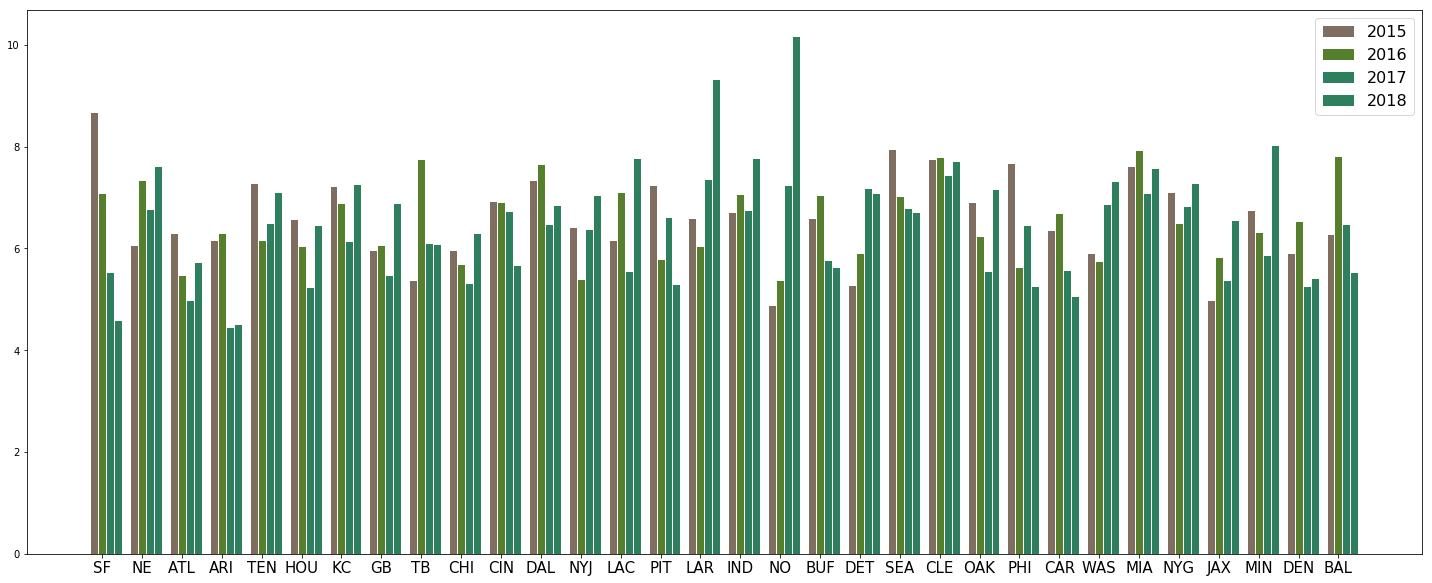

In [14]:
plt.figure(figsize=(25,10));
barWidth = 0.2

bars1 = [team for team in df['2015'].groupby(['Team'])['FantasyPoints'].mean()]
bars2 = [team for team in df['2016'].groupby(['Team'])['FantasyPoints'].mean()]
bars3 = [team for team in df['2017'].groupby(['Team'])['FantasyPoints'].mean()]
bars4 = [team for team in df['2018'].groupby(['Team'])['FantasyPoints'].mean()]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='2015')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='2016')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='2017')
plt.bar(r4, bars4, color='#2d7f5e', width=barWidth, edgecolor='white', label='2018')

plt.xticks([r + barWidth for r in range(len(bars1))], [team for team in df['Team'].unique()], size = 15)
plt.legend(fontsize = 16)

plt.savefig('../../images/grouped_bar_chart_weekly_performance_per_team.png');